# MOVIE RECOMMENDER SYSTEM

In [1]:
#importing all required libraries
import re
import numpy as np
import scipy.stats
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#reading the datasets
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
movies.head()

FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

In [ ]:
ratings.head()

In [41]:
movies.shape


(10329, 3)

In [42]:
ratings.shape


(105339, 4)

In [43]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [44]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [45]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [46]:
genres #taking all the movie genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [47]:
movie_title #taking all the movie titles

'[\'Toy Story\', \'Jumanji\', \'Grumpier Old Men\', \'Waiting to Exhale\', \'Father of the Bride Part II\', \'Heat\', \'Sabrina\', \'Tom and Huck\', \'Sudden Death\', \'GoldenEye\', \'American President, The\', \'Dracula: Dead and Loving It\', \'Balto\', \'Nixon\', \'Cutthroat Island\', \'Casino\', \'Sense and Sensibility\', \'Four Rooms\', \'Ace Ventura: When Nature Calls\', \'Money Train\', \'Get Shorty\', \'Copycat\', \'Assassins\', \'Powder\', \'Leaving Las Vegas\', \'Othello\', \'Now and Then\', \'Persuasion\', \'City of Lost Children, The (Cité des enfants perdus, La)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao)\', \'Dangerous Minds\', \'Twelve Monkeys (a.k.a. 12 Monkeys)\', \'Wings of Courage\', \'Babe\', \'Carrington\', \'Dead Man Walking\', \'Clueless\', \'Cry, the Beloved Country\', \'Richard III\', \'Dead Presidents\', \'Restoration\', \'Mortal Kombat\', \'To Die For\', \'How to Make an American Quilt\', \'Seven (a.k.a. Se7en)\', \'Pocahontas\', \'When Night Is Falling

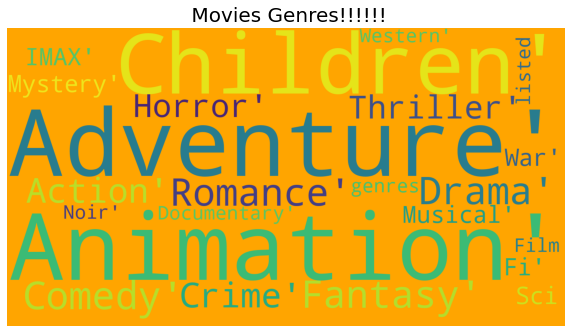

In [48]:
#Data Visualization


wordcloud_genre=WordCloud(width=1500,height=800,background_color='orange',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='red',min_font_size=2
                    ,min_word_length=3).generate(movie_title)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies Genres!!!!!!',fontsize=20)
plt.imshow(wordcloud_genre)

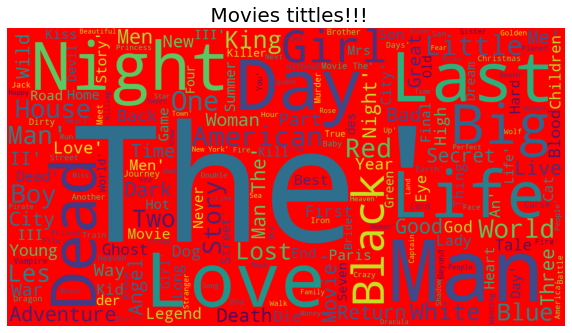

In [49]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies tittles!!!',fontsize=20)
plt.imshow(wordcloud_title)

In [51]:
#Merging datasets of movies and ratings
df=pd.merge(ratings,movies, how='left',on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


#case 1

In [52]:
#Selecting only particular columns 
data1=df[['title','genres','rating']]
data1


,title,genres,rating
0,Casino (1995),Crime|Drama,4.0
1,Powder (1995),Drama|Sci-Fi,1.5
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4.0
3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.0
4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.0
...,...,...,...
105334,Spotlight (2015),Thriller,4.0
105335,Pawn Sacrifice (2015),Drama,3.5
105336,Bridge of Spies (2015),Drama|Thriller,4.0
105337,Bone Tomahawk (2015),Horror|Western,2.5


In [53]:
#calculating average movie ratings and number of reviews

final=data1.groupby(['title','genres']).agg({'rating':['mean','count']})
final.columns=['Average movie Rating','Num Reviews']
final=final.reset_index()
final

,title,genres,Average movie Rating,Num Reviews
0,'71 (2014),Action|Drama|Thriller|War,3.500000,1
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,3.000000,1
2,'Round Midnight (1986),Drama|Musical,2.500000,1
3,'Til There Was You (1997),Drama|Romance,4.000000,3
4,"'burbs, The (1989)",Comedy,3.125000,20
...,...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,4.500000,1
10321,xXx (2002),Action|Crime|Thriller,2.958333,24
10322,xXx: State of the Union (2005),Action|Crime|Thriller,2.071429,7
10323,¡Three Amigos! (1986),Comedy|Western,3.012500,40


In [54]:
#sorting average movie rating in descending order
final.sort_values("Num Reviews",ascending=False)
final=final.sort_values("Average movie Rating",ascending=False)
final




,title,genres,Average movie Rating,Num Reviews
952,Being Human (1993),Drama,5.0,1
5567,Love Exposure (Ai No Mukidashi) (2008),Action|Comedy|Drama|Romance,5.0,1
2393,Dear Diary (Caro Diario) (1994),Comedy|Drama,5.0,1
10094,Wings (1927),Action|Drama|Romance|War,5.0,2
8813,Svengali (1931),Drama|Horror,5.0,1
...,...,...,...,...
7423,Raising Cain (1992),Horror|Thriller,0.5,1
3475,Full Body Massage (1995),Drama,0.5,1
4149,High School Musical (2006),Children|Comedy|Drama|Musical|Romance,0.5,2
4150,High School Musical 2 (2007),Comedy|Drama|Musical|Romance,0.5,1


In [55]:
#taking input from user
g=input("Genre(g):").strip()
t=int(input("Minimum reviews threshold(t):"))
N=int(input("Number of recommendations:"))

Genre(g):Action
Minimum reviews threshold(t):100
Number of recommendations:5


In [76]:
#checking for the given genre in the dataset
final=final[final['genres'].str.contains(g,case=False)]
final
        

,title,genres,Average movie Rating,Num Reviews
5877,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.264368,261
8587,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.228070,228
7411,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,4.212054,224
4585,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.189320,103
8586,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.188645,273
...,...,...,...,...
674,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy,3.106838,117
8583,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,3.102941,136
1452,Broken Arrow (1996),Action|Adventure|Thriller,3.096330,109
843,Batman Forever (1995),Action|Adventure|Comedy|Crime,2.964968,157


In [77]:
#taking only the dataset where the no of reviews is greater than the specified value by user 
final=pd.DataFrame(final[(final['Num Reviews']>t)])
m=final.drop('genres',axis=1)

In [112]:
#renaming the title to movie title
s=m.rename({'title':'Movie title'},axis=1)
s.reset_index()
s.insert(0,"SL.No",range(1,1+len(s)))

CASE 1 OUTPUT

In [113]:
#printing the dataset of n rows
s[:N]


,SL.No,Movie title,Average movie Rating,Num Reviews
5877,1,"Matrix, The (1999)",4.264368,261
8587,2,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
7411,3,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
4585,4,Inception (2010),4.189320,103
8586,5,Star Wars: Episode IV - A New Hope (1977),4.188645,273


# Case 2

In [85]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [86]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [87]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]


In [91]:
p=input().strip()
N=int(input())

Toy Story (1995)
5


In [108]:
#printing reccomendation of movies simillar to user input 
pq=pd.DataFrame(recommendations(p)[:N])
pq=pq.rename({'title':'Movie title'},axis=1)
pq.reset_index()
pq.insert(0,"SL.No",range(1,1+len(pq)))


CASE 2 OUTPUT

In [109]:
pq

,SL.No,Movie title
1815,1,Antz (1998)
2496,2,Toy Story 2 (1999)
2967,3,"Adventures of Rocky and Bullwinkle, The (2000)"
3166,4,"Emperor's New Groove, The (2000)"
3811,5,"Monsters, Inc. (2001)"


# Case 3

In [154]:
#df1=df[['userId','movieId','rating','title']]
#df1
df1=df.pivot_table(index=['userId'],columns=['title'],values='rating')
df1

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [155]:
#Normalize
matrix_norm=df1.subtract(df1.mean(axis=1),axis='rows')
matrix_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#usersimillarity
user_simillarity=matrix_norm.T.corr()
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
5,-0.094491,NaN,0.162938,-0.188982,1.000000,-0.571548,0.120497,NaN,-0.158114,NaN,...,-0.444428,NaN,NaN,0.894125,NaN,-0.651900,-0.189340,-0.191492,-0.052658,-0.186282


In [161]:
#taking iput from user
picked_userid=int(input("Userid"))
N=int(input("Num recommendations"))
k=int(input("Threshold for simillar user"))

Userid4
Num recommendations5
Threshold for simillar user100


In [162]:
#dropping the picked user id
user_simillarity.drop(index=picked_userid,inplace=True)
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
5,-0.094491,NaN,0.162938,-0.188982,1.000000,-0.571548,0.120497,NaN,-0.158114,NaN,...,-0.444428,NaN,NaN,0.894125,NaN,-0.651900,-0.189340,-0.191492,-0.052658,-0.186282
6,0.579821,NaN,NaN,NaN,-0.571548,1.000000,0.300239,NaN,NaN,1.000000,...,0.285950,NaN,NaN,0.132453,NaN,NaN,0.194389,0.642575,1.000000,-0.003187
7,0.190592,-0.555556,-0.201332,-0.118798,0.120497,0.300239,1.000000,0.250654,0.304669,NaN,...,0.215918,NaN,-0.280976,-0.030929,0.218218,-0.097391,0.048858,0.269436,0.126471,0.002346


In [163]:
#setting a random positive threshold in range from -1 to 1
user_simillarity_threshold=0.3

In [165]:
#getting to k simmilar users
simillar_users=user_simillarity[user_simillarity[picked_userid]>user_simillarity_threshold][picked_userid].sort_values(ascending=False)[:k]


In [167]:
#simillar users for input user
print(f'the simillar users for{picked_userid} are',simillar_users)

the simillar users for4 are userId
272    1.000000
581    1.000000
134    1.000000
435    1.000000
450    1.000000
         ...   
413    0.423042
354    0.413197
650    0.412984
589    0.408248
65     0.408248
Name: 4, Length: 100, dtype: float64


In [ ]:
#narrowing down ie removing movies which has already been watched by the target user


In [169]:
#movies watched by target user
picked_userid_watched=matrix_norm[matrix_norm.index==picked_userid].dropna(axis=1,how='all')
picked_userid_watched

title,12 Angry Men (1957),"Adventures of Robin Hood, The (1938)",Amadeus (1984),Annie Hall (1977),"Apartment, The (1960)",Austin Powers: The Spy Who Shagged Me (1999),Beauty of the Day (Belle de jour) (1967),"Big Lebowski, The (1998)","Big Sleep, The (1946)","Birds, The (1963)",...,Top Hat (1935),Toy Story 2 (1999),"Treasure of the Sierra Madre, The (1948)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twin Falls Idaho (1999),Ulee's Gold (1997),Who Framed Roger Rabbit? (1988),Who's Afraid of Virginia Woolf? (1966),William Shakespeare's A Midsummer Night's Dream (1999),"Wizard of Oz, The (1939)"
userId,,,,,,,,,,,,,,,,,,,,,
4,0.83871,0.83871,0.83871,-0.16129,-0.16129,-3.16129,-0.16129,-2.16129,-0.16129,-1.16129,...,-0.16129,0.83871,0.83871,0.83871,0.83871,0.83871,0.83871,0.83871,-0.16129,0.83871


In [171]:
#movies that simillar users watched
simillar_user_movies=matrix_norm[matrix_norm.index.isin(simillar_users.index)].dropna(axis=1,how='all')
simillar_user_movies

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),10th & Wolf (2006),11:14 (2003),...,Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,-1.902062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,0.512579,NaN,NaN,NaN,0.512579,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
#dropping target user watched movies among simillar users
simillar_user_movies.drop(picked_userid_watched.columns,axis=1,inplace=True,errors='ignore')
simillar_user_movies.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),10th & Wolf (2006),11:14 (2003),...,Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,-1.902062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
#reccommending the movie for target user
item_score={} #dict to store scores
for i in simillar_user_movies.columns:
    movie_rating=simillar_user_movies[i]  #taking the individual ratings 
    total=0
    count=0
    for u in simillar_users.index:    #loop through simillar users
        if pd.isna(movie_rating[u])==False:
            score=simillar_users[u]*movie_rating[u]
            total+=score
            count+=1
    item_score[i]=total/count  #average score for the item
item_score=pd.DataFrame(item_score.items(),columns=['Movie title','movie_score'])
#sorting movie by score
ranked_item_score=item_score.sort_values(by='movie_score',ascending=False)

ranked_item_score.head()
        
    

,Movie title,movie_score
1118,Eve's Bayou (1997),1.550000
640,Central Station (Central do Brasil) (1998),1.506474
59,8 1/2 (8½) (1963),1.506474
621,Castaway on the Moon (Kimssi pyoryugi) (2009),1.342105
1419,"Gods Must Be Crazy II, The (1989)",1.340909


CASE 3 OUTPUT

In [217]:
#cleaning to give output as shown
ranked_item_score.reset_index()
ranked_item_score.insert(0,"SL.No",range(1,1+len(ranked_item_score)))
ranked_item_score
ranked_item_score.drop('movie_score',axis=1)[:N]




,SL.No,Movie title
1118,1,Eve's Bayou (1997)
640,2,Central Station (Central do Brasil) (1998)
59,3,8 1/2 (8½) (1963)
621,4,Castaway on the Moon (Kimssi pyoryugi) (2009)
1419,5,"Gods Must Be Crazy II, The (1989)"
